# Module 2: Exploration data analysis visualization

In [1]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore")  

In [3]:
data = p.read_csv('covid.csv')

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [6]:
p.crosstab(df.covid_res,df.patient_type)

patient_type,1,2
covid_res,,
1,152361,68296
2,239785,39250
3,52543,14367


In [7]:
df["covid_res"].unique()

array([1, 2, 3], dtype=int64)

In [8]:
df['covid_res'].replace([1,2,3],[0,1,2],inplace=True)
df['covid_res'].value_counts().to_frame()

,covid_res
1,279035
0,220657
2,66910


Text(0.5, 1.0, 'Covid Result')

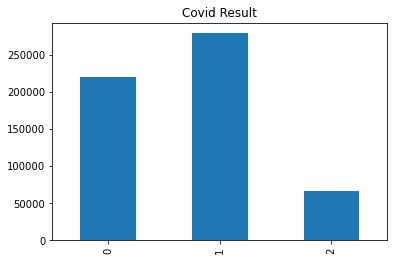

In [9]:
df['covid_res'].value_counts().sort_index().plot.bar()
plt.title('Covid Result')

In [10]:
df.rename(columns={'covid_res':'Chance'},inplace=True)

In [11]:
df=df[df['Chance']!=2]

<AxesSubplot:title={'center':'sex'}, xlabel='Chance'>

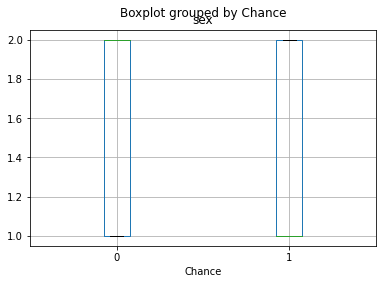

In [12]:
df.boxplot(column="sex", by="Chance")

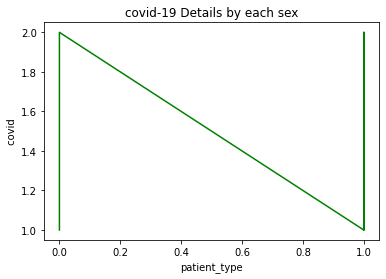

In [13]:
patient_type = df["patient_type"]
covid = df["Chance"]


plt.plot(covid, patient_type, color='g')
plt.xlabel('patient_type')
plt.ylabel(' covid ')
plt.title('covid-19 Details by each sex')
plt.show()

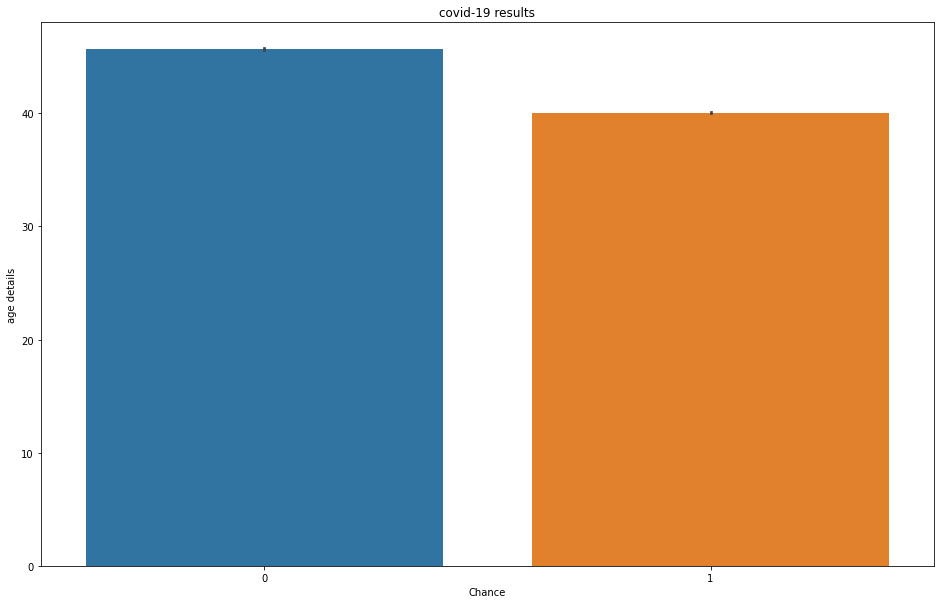

In [14]:
fig, ax = plt.subplots(figsize = (16,10))
ax = s.barplot(x='Chance', y='age', data=df)
ax.set(ylabel = 'age details', title = 'covid-19 results')
plt.show()

# Univariate Analysis

2    50.65
1    49.35
Name: sex, dtype: float64

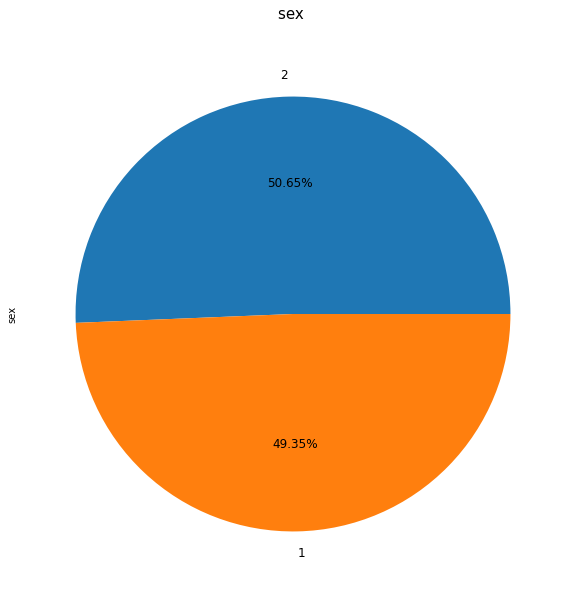

In [15]:
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'sex')

1    55.84
0    44.16
Name: Chance, dtype: float64

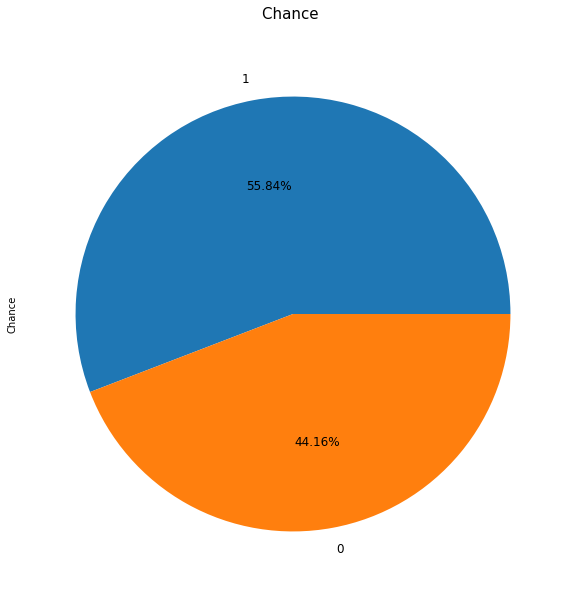

In [16]:
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'Chance')

Text(0.5, 1.0, 'Intubed')

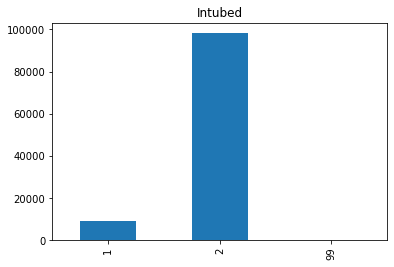

In [17]:
df=df[df['intubed']!=97]
df['intubed'].value_counts().sort_index().plot.bar()
plt.title('Intubed')

Text(0.5, 1.0, 'pneumonia')

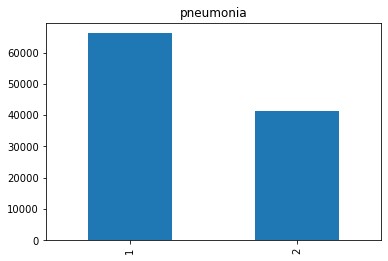

In [18]:
df=df[df['pneumonia']!=99]
df['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('pneumonia')


Text(0.5, 1.0, 'Pregnancy')

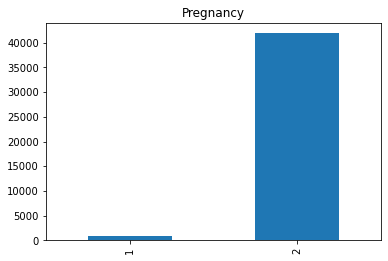

In [19]:
df=df[df['pregnancy']!=97]
df=df[df['pregnancy']!=98]
df['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Pregnancy')

Text(0.5, 1.0, 'Diabetes')

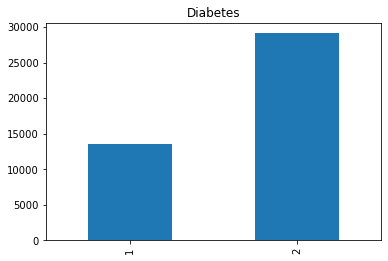

In [20]:
df=df[df['diabetes']!=98]
df['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

Text(0.5, 1.0, 'COPD')

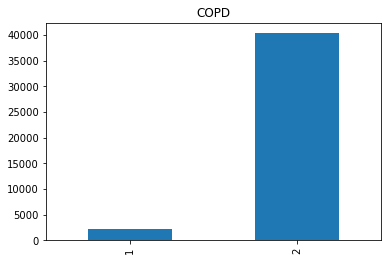

In [21]:
df=df[df['copd']!=98]
df['copd'].value_counts().sort_index().plot.bar()
plt.title('COPD')

Text(0.5, 1.0, 'Asthma')

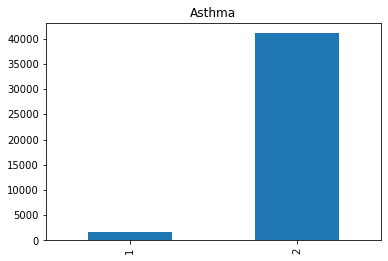

In [22]:
df=df[df['asthma']!=98]
df['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asthma')

Text(0.5, 1.0, 'Inmsupr')

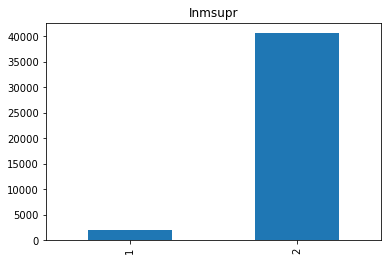

In [23]:
df=df[df['inmsupr']!=98]
df['inmsupr'].value_counts().sort_index().plot.bar()
plt.title('Inmsupr')

Text(0.5, 1.0, 'Contact other covid')

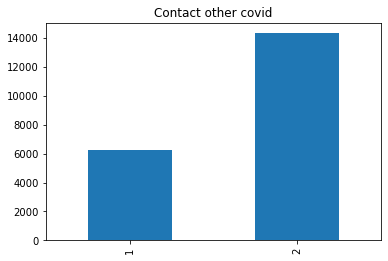

In [24]:
df=df[df['contact_other_covid']!=99]
df['contact_other_covid'].value_counts().sort_index().plot.bar()
plt.title('Contact other covid')

Text(0.5, 1.0, 'Correlation heatmap')

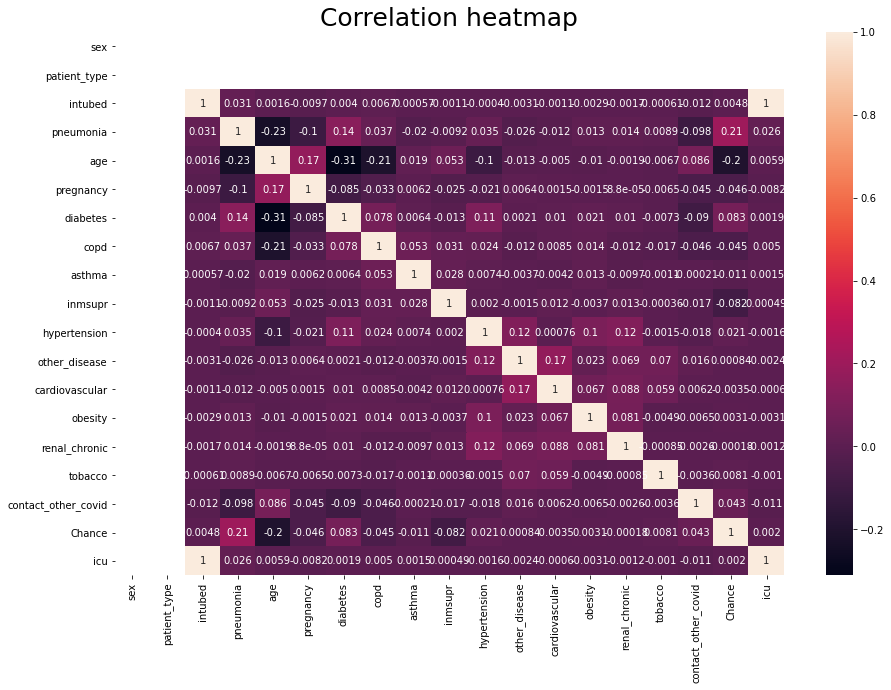

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(df.corr(), ax=ax, annot=True)
plt.title('Correlation heatmap',size=25)

# Bivariate Analysis

Text(13.06111979166667, 0.5, 'Count')

<Figure size 504x360 with 0 Axes>

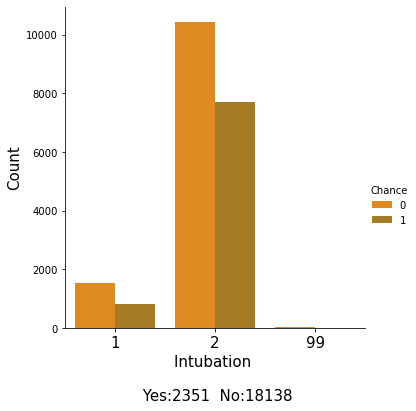

In [26]:
plt.figure(figsize=(7,5))
s.catplot('intubed',data=df,kind='count',palette='autumn_d',hue='Chance')
plt.xticks(size=15,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[2]),size=15)
plt.ylabel('Count',size=15)

In [27]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Chance,icu
21,154fea,1,2,02-06-2020,02-06-2020,9999-99-99,2,2,25,2,...,2,2,2,2,2,2,2,1,0,2
30,16e14e,1,2,22-06-2020,17-06-2020,9999-99-99,2,2,52,2,...,2,2,2,2,1,2,1,1,0,2
71,149f1c,1,2,17-06-2020,12-06-2020,9999-99-99,2,1,51,2,...,2,2,2,2,2,2,2,1,0,2
79,1d5df2,1,2,08-06-2020,07-06-2020,9999-99-99,1,1,67,2,...,2,1,2,2,1,2,2,1,0,2
93,18f860,1,2,27-05-2020,27-05-2020,9999-99-99,2,1,59,2,...,2,2,2,2,2,2,2,1,0,2


In [28]:
features=['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']
list(enumerate(features))

[(0, 'sex'),
 (1, 'patient_type'),
 (2, 'intubed'),
 (3, 'pneumonia'),
 (4, 'age'),
 (5, 'pregnancy'),
 (6, 'diabetes'),
 (7, 'copd'),
 (8, 'asthma'),
 (9, 'inmsupr'),
 (10, 'hypertension'),
 (11, 'other_disease'),
 (12, 'cardiovascular'),
 (13, 'obesity'),
 (14, 'renal_chronic'),
 (15, 'tobacco'),
 (16, 'contact_other_covid'),
 (17, 'icu')]

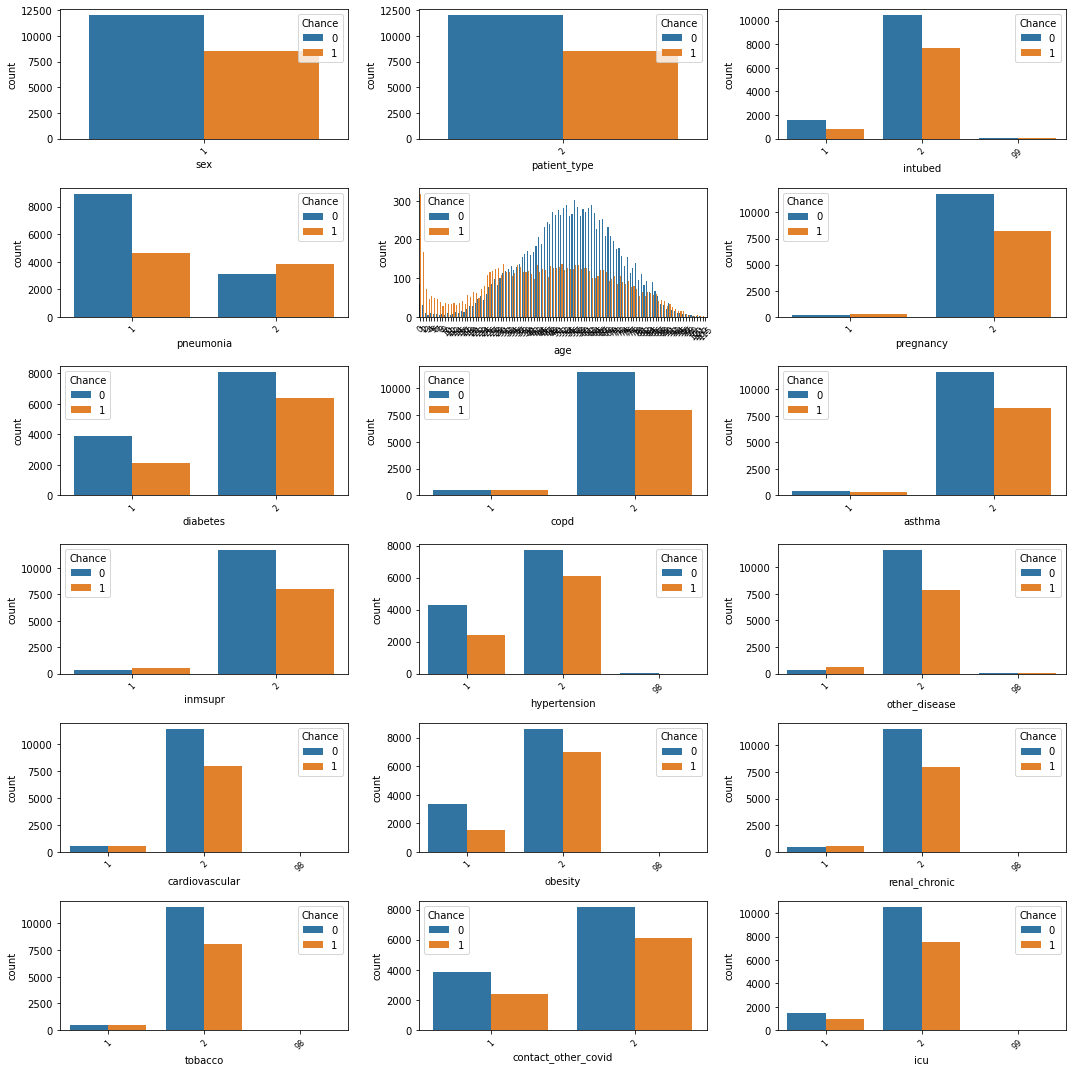

In [29]:
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    s.countplot(i[1],hue='Chance',data=df)
    plt.xticks(rotation=45,size=8)
    plt.tight_layout()                     

Spliting Train/Test:

In [30]:
X = df.drop(labels='Chance', axis=1)
y = df.loc[:,'Chance']    

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  14370
Number of test dataset:  6159
Total number of dataset:  20529


In [32]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'Chance',
       'icu'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'Chance',
       'icu']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)


In [34]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Chance,icu
21,13356,0,0,7,6,98,1,1,25,1,...,1,1,1,1,1,1,1,0,0,1
30,14379,0,0,83,70,98,1,1,52,1,...,1,1,1,1,0,1,0,0,0,1
71,12885,0,0,63,48,98,1,0,51,1,...,1,1,1,1,1,1,1,0,0,1
79,18669,0,0,26,27,98,0,0,67,1,...,1,0,1,1,0,1,1,0,0,1
93,15710,0,0,103,115,98,1,0,59,1,...,1,1,1,1,1,1,1,0,0,1
